In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

data = pd.read_csv('invasion.csv')
data.head()

X_train = data.drop('class', axis=1)
y_train = data['class']

parameters = {'n_estimators': range(10, 51, 10), 'max_depth': range(1, 11), 'min_samples_split': range(5, 16), 'min_samples_leaf': range(1, 11)}
clf = RandomForestClassifier(random_state=0)

grid_search_rf = GridSearchCV(clf, param_grid=parameters, cv=5, n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

KeyboardInterrupt: 

0.8053691275167785

In [10]:
best_rf = grid_search_rf.best_estimator_
X_test = pd.read_csv('operative_information.csv')
predictions = pd.Series(best_rf.predict(X_test))

predictions.value_counts()

fighter      675
transport    595
cruiser      230
Name: count, dtype: int64

<Axes: xlabel='feature_importances', ylabel='feature'>

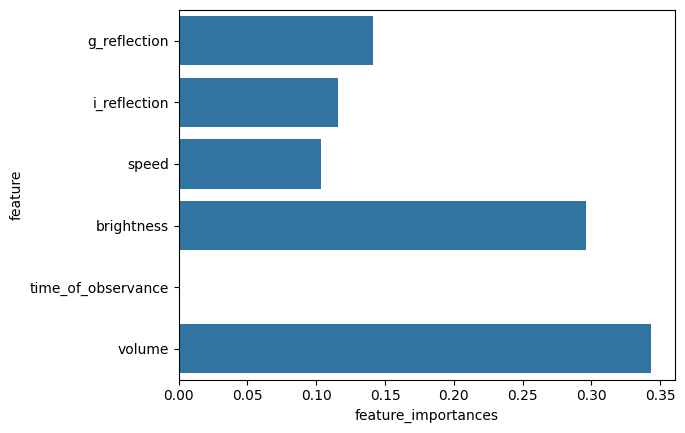

In [11]:
features = best_rf.feature_importances_

features_pd = pd.DataFrame({'feature': list(X_test),
                            'feature_importances': features})

sns.barplot(x='feature_importances', y='feature', data = features_pd)

In [18]:
data_space = pd.read_csv('space_can_be_a_dangerous_place.csv')

X_train = data_space.drop('dangerous', axis=1)
y_train = data_space.dangerous

In [19]:
clf = RandomForestClassifier(random_state=0)
grid_search_rf = RandomizedSearchCV(clf, param_distributions=parameters, n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
                   param_distributions={'max_depth': range(1, 11),
                                        'min_samples_leaf': range(1, 11),
                                        'min_samples_split': range(5, 16),
                                        'n_estimators': range(10, 51, 10)})

<Axes: xlabel='feature_importances', ylabel='feature'>

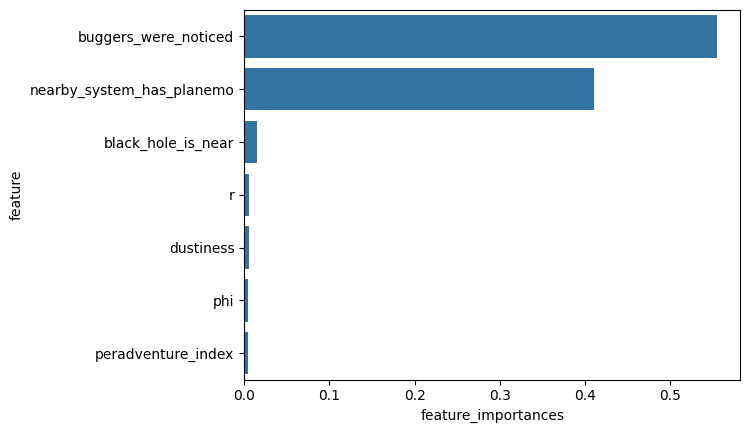

In [20]:
best_rf = grid_search_rf.best_estimator_

feature_importance = best_rf.feature_importances_
feature_importance_pd = pd.DataFrame({'feature': list(X_train),
                                      'feature_importances': feature_importance}).sort_values('feature_importances', ascending=False)

sns.barplot(x='feature_importances', y='feature', data = feature_importance_pd)